## Домашнее задание 
- Постройте с помощью subplots графики цены для датасета aws spot prices для ОС Windows и всех архитектур вида i*. 

*Обратите внимание на то, какой лучше сделать период между датами для удобного отображения.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# загрузка датафрейма из файла и приведение к нормальному виду
df = pd.read_csv('data/ap-northeast-1.csv', parse_dates=True, index_col=[0], \
                 names=['Date', 'Architecture', 'OS', 'Zone', 'Price'])

In [3]:
# выборка архитектуры, начинающейся на i из датафрейма
df = df[(df['OS'] == 'Windows') & (df['Architecture'].str.startswith('i'))]
df = df.sort_index()
df

,Architecture,OS,Zone,Price
Date,,,,
2017-03-30 07:36:21+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2157
2017-03-30 07:45:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2162
2017-03-30 07:46:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2164
2017-03-30 07:47:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2195
2017-03-30 07:48:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2198
...,...,...,...,...
2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1c,0.2200
2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1a,0.2200
2017-05-08 21:42:29+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2210


In [4]:
# приведение даты к виду: год-месяц-число
df.index = df.index.strftime('%Y-%m-%d')

In [5]:
# создание словаря с подфреймами основного фрейма, сгруппированных по типам архитектуры
arch_dfs = []
arch_list = df['Architecture'].unique()
for arch in arch_list:
    df_i = df[df['Architecture'] == arch]\
           .Price.groupby(['Date'])\
           .agg(['min', 'max', 'mean'])
    arch_dfs.append(df_i)

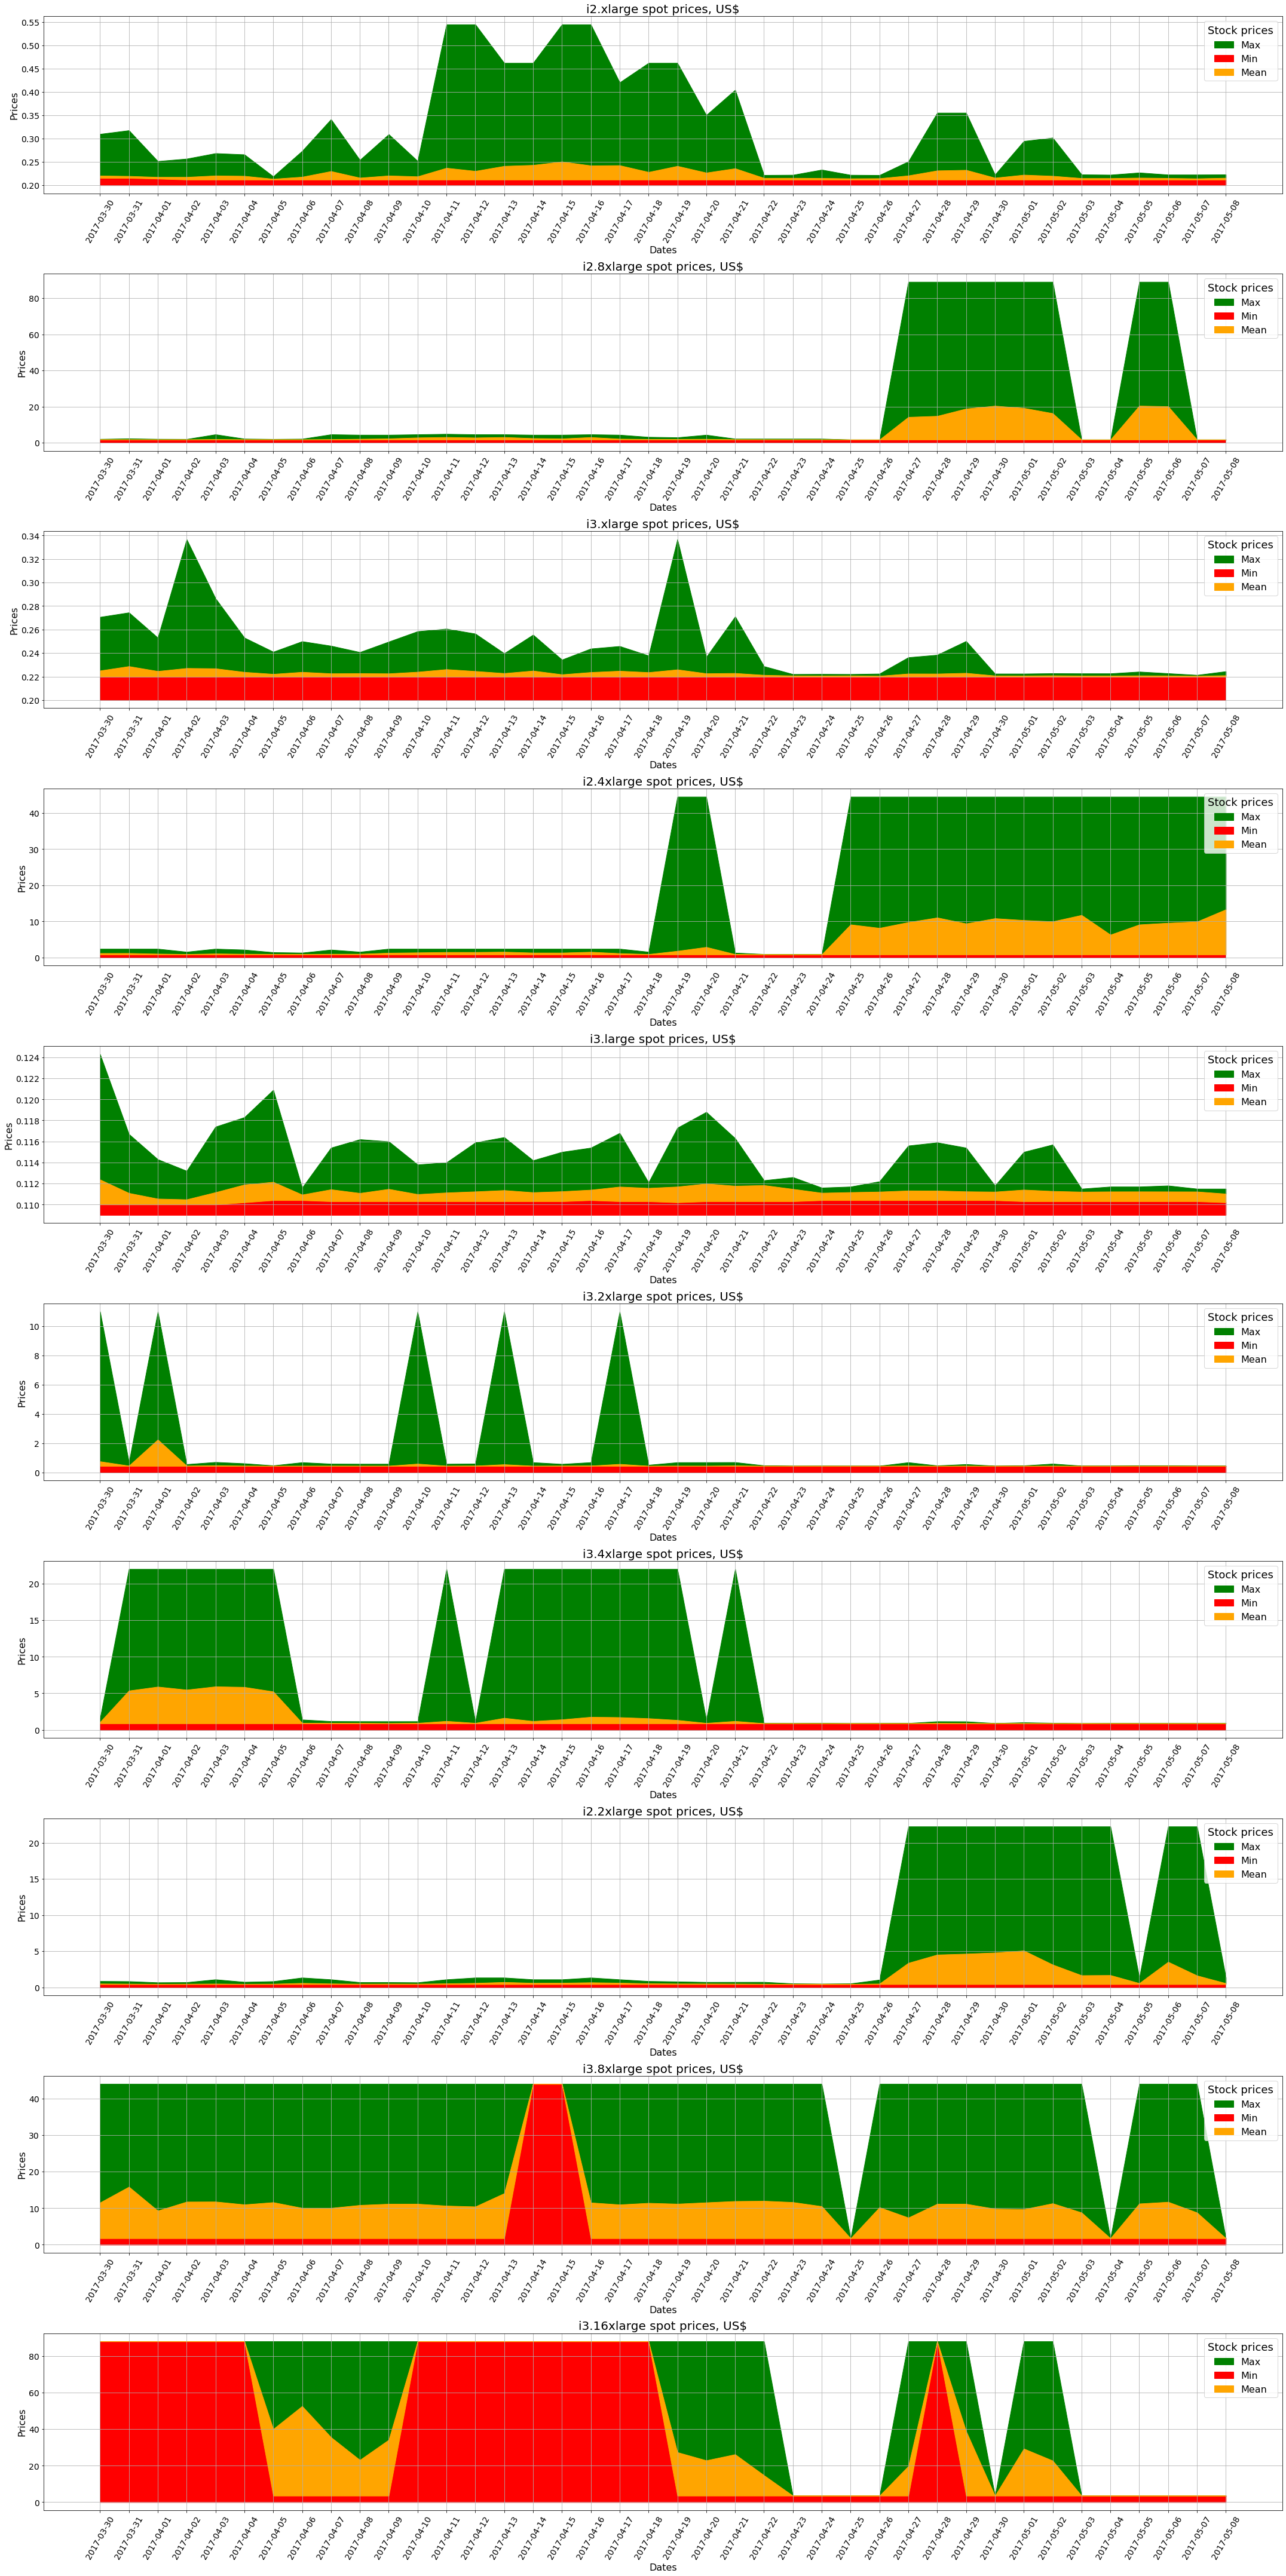

In [6]:
fig, axes = plt.subplots(len(arch_list), 1, figsize = (30, 60))
for row, df_i in enumerate(arch_dfs):
    x = df_i.index
    y_min = df_i['min']
    y_max = df_i['max']
    y_mean = df_i['mean']
    y_low = 0.109 if row == 4 else 0.2
    axes[row].fill_between(x, y_max, y_mean, color='g', label='Max')
    axes[row].fill_between(x, y_min, y_low if row in (0,2,4) else 0, color='r', label='Min')
    axes[row].fill_between(x, y_mean, y_min, color='orange', label='Mean')
    axes[row].set_title(arch_list[row] + ' spot prices, US$', fontsize=20)
    axes[row].set_xlabel('Dates', fontsize=16)
    axes[row].set_ylabel('Prices', fontsize=16)
    axes[row].set_xticklabels(x, rotation=60)
    axes[row].tick_params(labelsize=14)
    axes[row].legend(title='Stock prices', title_fontsize=18, fontsize=16)
    axes[row].grid()
plt.tight_layout()
plt.show()